 1.4. Использование библиотек NumPy, SciPy Практические задания

1. Построение распределений: 
Сгенерировать выборку с распределением Рэлэя используя numpy и scipy и построить на основе ее кривую плотности распределения на основе гистограммы из Matplotlib.

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

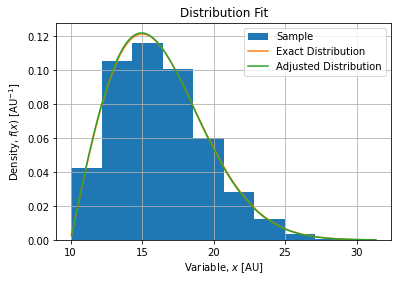

In [3]:
X = stats.rayleigh(loc=10, scale=5)
x0 = X.rvs(size=10000, random_state=123)
loc, scale = stats.rayleigh.fit(x0)
xl = np.linspace(x0.min(), x0.max(), 100)
fig, axe = plt.subplots()
axe.hist(x0, density=1, label="Sample")
axe.plot(xl, X.pdf(xl), label="Exact Distribution")
axe.plot(xl, stats.rayleigh(scale=scale, loc=loc).pdf(xl), label="Adjusted Distribution")
axe.set_title("Distribution Fit")
axe.set_xlabel("Variable, $x$ $[\mathrm{AU}]$")
axe.set_ylabel("Density, $f(x)$ $[\mathrm{AU}^{-1}]$")
axe.legend()
axe.grid()

2. Построение графика на по функции: Сгенерировать массивы по функции (x^2 + y^2 - 1)^3 - x^2 y^3 = 0 и построить на основе них график.

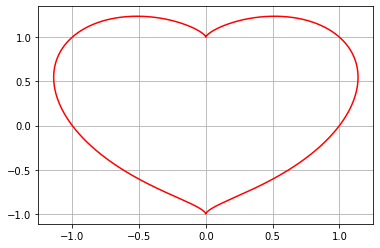

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Create the vectors X and Y
x = np.arange(-2, 2, 0.0001)
y_1 = 0.5 * ((x ** 2) ** (1/3) + ((x ** 4) ** (1/3) + 4 * (1 - x ** 2)) ** (1/2))
y_2 = 0.5 * ((x ** 2) ** (1/3) - ((x ** 4) ** (1/3) + 4 * (1 - x ** 2)) ** (1/2))
# y = 1 / x

# Create the plot
plt.plot(x,y_1, 'r')
plt.plot(x,y_2, 'r')
plt.grid()

# Show the plot
plt.show()

3. Анализ зависимостей: Найти зависимости представленные в датасете приложенном к заданию.

In [5]:
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charhes = []

In [6]:
#разберем файл по колонкам

with open('dataset.txt', mode= 'r') as file:
    for human in  file.readlines():# 
        #print(human)
        age.append(int(human.split(',')[0]))#  разделение по элементу

        if human.split(',')[1] == 'male':
            sex.append(1)
        else:
            sex.append(0)

        bmi.append(float(human.split(',')[2]))

        children.append(int(human.split(',')[3]))

        if human.split(',')[4] == 'yes':
            smoker.append(1)
        else:
            smoker.append(0)

        if human.split(',')[5] == 'northwest':
            region.append(0)
        elif human.split(',')[5] == 'northeast':
            region.append(1)
        elif human.split(',')[5] == 'southwest':
            region.append(2)
        elif human.split(',')[5] == 'southeast':
            region.append(3)
        
        charhes.append(float(human.split(',')[6]))

In [7]:
# преобразуем в массив нампи
age = np.array(age)
sex = np.array(sex)
bmi = np.array(bmi)
children = np.array(children)
smoker = np.array(smoker)
region = np.array(region)
charhes = np.array(charhes)

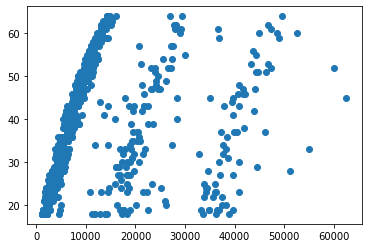

In [8]:
# посмотрим зависимость страховки от возраста
plt.scatter(charhes, age)

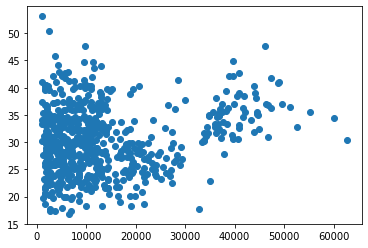

In [9]:
plt.scatter(charhes, bmi)

<BarContainer object of 670 artists>

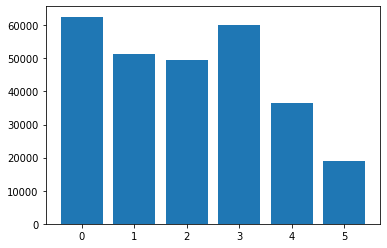

In [10]:
plt.bar(children, charhes)

<BarContainer object of 670 artists>

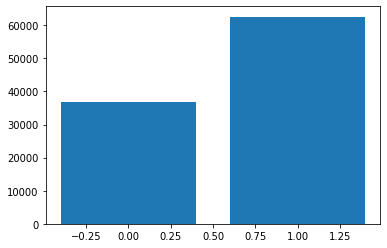

In [11]:
plt.bar(smoker, charhes)

<BarContainer object of 670 artists>

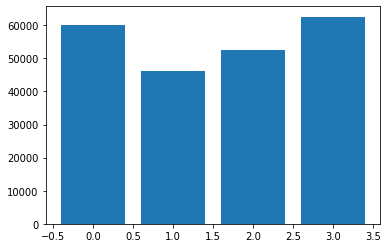

In [12]:
plt.bar(region, charhes)

<BarContainer object of 670 artists>

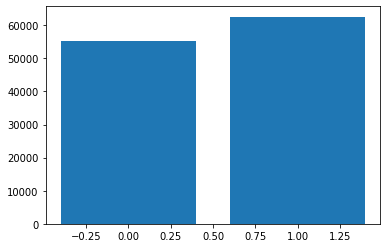

In [13]:
plt.bar(sex, charhes)

(array([278., 188.,  74.,  38.,  19.,  29.,  24.,  15.,   3.,   2.]),
 array([ 1131.5066  ,  7277.643249, 13423.779898, 19569.916547,
        25716.053196, 31862.189845, 38008.326494, 44154.463143,
        50300.599792, 56446.736441, 62592.87309 ]),
 <BarContainer object of 10 artists>)

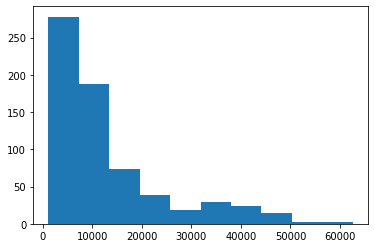

In [14]:
# посмотрим график страховки
plt.hist(charhes)

(array([107.,  83.,  55.,  78.,  52.,  69.,  62.,  58.,  53.,  53.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

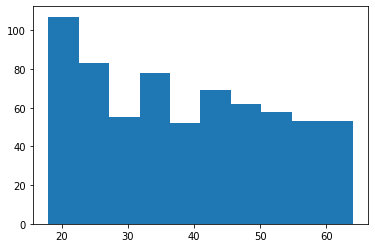

In [15]:
# посмотрим график возраста
plt.hist(age)

(array([ 27.,  80., 129., 153., 142.,  79.,  44.,  11.,   3.,   2.]),
 array([16.815 , 20.4465, 24.078 , 27.7095, 31.341 , 34.9725, 38.604 ,
        42.2355, 45.867 , 49.4985, 53.13  ]),
 <BarContainer object of 10 artists>)

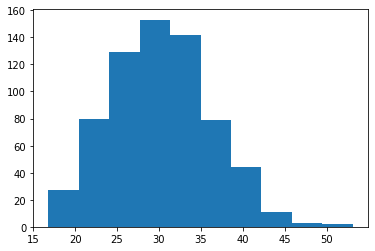

In [16]:
# посмотрим график веса
plt.hist(bmi)

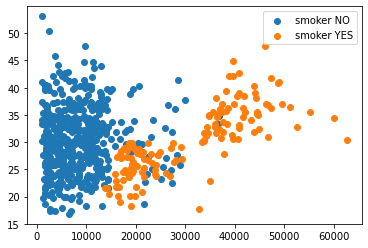

In [17]:
# посмотрим зависимость страховки от  и курения

plt.scatter(charhes[smoker == 0], bmi[smoker == 0], label = "smoker NO")
plt.scatter(charhes[smoker == 1], bmi[smoker == 1], label = "smoker YES")
plt.legend()
plt.show()

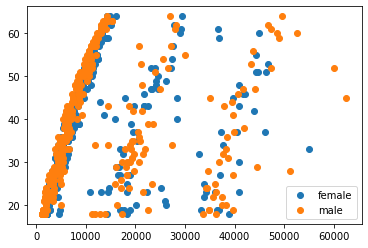

In [18]:
# посмотрим зависимость страховки от возраста и пола
plt.scatter(charhes[sex == 0], age[sex == 0], label = "female")
plt.scatter(charhes[sex == 1], age[sex == 1], label = "male")
plt.legend()
plt.show()

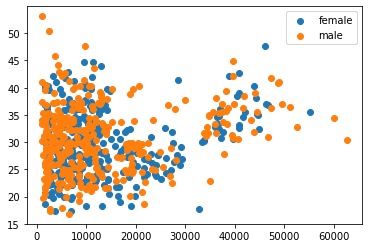

In [19]:
# посмотрим зависимость страховки от веса и пола
plt.scatter(charhes[sex == 0], bmi[sex == 0], label = "female")
plt.scatter(charhes[sex == 1], bmi[sex == 1], label = "male")
plt.legend()
plt.show()

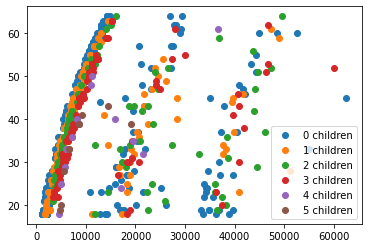

In [20]:
# посмотрим зависимость страховки от возраста и количества детей
plt.scatter(charhes[children == 0], age[children == 0], label = "0 children")
plt.scatter(charhes[children == 1], age[children == 1], label = "1 children")
plt.scatter(charhes[children == 2], age[children == 2], label = "2 children")
plt.scatter(charhes[children == 3], age[children == 3], label = "3 children")
plt.scatter(charhes[children == 4], age[children == 4], label = "4 children")
plt.scatter(charhes[children == 5], age[children == 5], label = "5 children")
plt.legend()
plt.show()